# DAKTARI- THE AI MEDICAL CHATBOT

# PROJECT SUMMARY

# 1. BUSINESS UNDERSTANDING

# 2. BUSINESS PROBLEM

# 3. OBJECTIVES

## 3.1 Main objective

## 3.2 Specific objective

## 3.3 Research Questions

## 3.4 Metric of success

# 4. DATA UNDERSTANDING

## 4.1 Data Limitation

# 5. DATA EXPLORATION

## 5.1 Loading a Dataset

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install huggingface_hub


In [3]:
df = pd.read_parquet("hf://datasets/DrBenjamin/ai-medical-chatbot/dialogues.parquet")
df.head()

,Description,Patient,Doctor
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...


In [4]:
df.shape

(256916, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256916 entries, 0 to 256915
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  256916 non-null  object
 1   Patient      256916 non-null  object
 2   Doctor       256916 non-null  object
dtypes: object(3)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

Description    0
Patient        0
Doctor         0
dtype: int64

Since our data is not missing any missing values we can move to cleaning the text.

## 5.2 Data Cleaning

In [7]:
import nltk # natural language toolkit
import re # regular expressions
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### 5.2.1 Text preprocessing

In [9]:
df.columns

Index(['Description', 'Patient', 'Doctor'], dtype='object')

**Tokenization**

Let's breaks down each text into a list of words **tokens**

In [10]:
# Apply tokenization to each text column
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
for col in ['Description', 'Patient', 'Doctor']:
    df[col + '_cleaned'] = df[col].astype(str).apply(word_tokenize)

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[Q, ., What, does, abutment, of, the, nerve, r...","[Hi, doctor, ,, I, am, just, wondering, what, ...","[Hi, ., I, have, gone, through, your, query, w..."
1,"[Q, ., What, should, I, do, to, reduce, my, we...","[Hi, doctor, ,, I, am, a, 22-year-old, female,...","[Hi, ., You, have, really, done, well, with, t..."
2,"[Q., I, have, started, to, get, lots, of, acne...","[Hi, doctor, !, I, used, to, have, clear, skin...","[Hi, there, Acne, has, multifactorial, etiolog..."
3,"[Q, ., Why, do, I, have, uncomfortable, feelin...","[Hello, doctor, ,, I, am, having, an, uncomfor...","[Hello, ., The, popping, and, discomfort, what..."
4,"[Q, ., My, symptoms, after, intercourse, threa...","[Hello, doctor, ,, Before, two, years, had, se...","[Hello, ., The, HIV, test, uses, a, finger, pr..."


**Lowercasing**

Let's convert our tokenized text to **lowercase** to ensure consistency in our data.

In [11]:
# Convert all tokens to lowercase
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lambda x: [word.lower() for word in x])

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()


,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[q, ., what, does, abutment, of, the, nerve, r...","[hi, doctor, ,, i, am, just, wondering, what, ...","[hi, ., i, have, gone, through, your, query, w..."
1,"[q, ., what, should, i, do, to, reduce, my, we...","[hi, doctor, ,, i, am, a, 22-year-old, female,...","[hi, ., you, have, really, done, well, with, t..."
2,"[q., i, have, started, to, get, lots, of, acne...","[hi, doctor, !, i, used, to, have, clear, skin...","[hi, there, acne, has, multifactorial, etiolog..."
3,"[q, ., why, do, i, have, uncomfortable, feelin...","[hello, doctor, ,, i, am, having, an, uncomfor...","[hello, ., the, popping, and, discomfort, what..."
4,"[q, ., my, symptoms, after, intercourse, threa...","[hello, doctor, ,, before, two, years, had, se...","[hello, ., the, hiv, test, uses, a, finger, pr..."


**Stopword Removal**

By removing **Stopwords** like *the, is, and*   which don’t really  carry meaningful information we reduce the noise in our data.

In [12]:
words_to_remove = ['hi', 'hello', 'doctor', 'thanks', 'thank', 'please', 'kindly','q','but']
stop_words = set(stopwords.words('english')+ words_to_remove)

# Remove stopwords
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lambda x: [word for word in x if word not in stop_words])

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[., abutment, nerve, root, mean, ?]","[,, wondering, abutting, abutment, nerve, root...","[., gone, query, diligence, would, like, know,..."
1,"[., reduce, weight, gained, due, genetic, hypo...","[,, 22-year-old, female, diagnosed, hypothyroi...","[., really, done, well, hypothyroidism, proble..."
2,"[q., started, get, lots, acne, face, ,, partic...","[!, used, clear, skin, since, moved, new, plac...","[acne, multifactorial, etiology, ., acne, soap..."
3,"[., uncomfortable, feeling, middle, spine, lef...","[,, uncomfortable, feeling, middle, spine, lef...","[., popping, discomfort, felt, either, imprope..."
4,"[., symptoms, intercourse, threatns, even, neg...","[,, two, years, sex, call, girl, dark, locatio...","[., hiv, test, uses, finger, prick, blood, sam..."


**Punctuation Removal**

Removing punctuation marks like *!, ., ,*  because they rarely add semantic meaning in our text analyses.

In [13]:
# Remove punctuation
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lambda x: [word for word in x if word not in string.punctuation])

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()


,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[abutment, nerve, root, mean]","[wondering, abutting, abutment, nerve, root, m...","[gone, query, diligence, would, like, know, he..."
1,"[reduce, weight, gained, due, genetic, hypothy...","[22-year-old, female, diagnosed, hypothyroidis...","[really, done, well, hypothyroidism, problem, ..."
2,"[q., started, get, lots, acne, face, particula...","[used, clear, skin, since, moved, new, place, ...","[acne, multifactorial, etiology, acne, soap, i..."
3,"[uncomfortable, feeling, middle, spine, left, ...","[uncomfortable, feeling, middle, spine, left, ...","[popping, discomfort, felt, either, improper, ..."
4,"[symptoms, intercourse, threatns, even, negati...","[two, years, sex, call, girl, dark, location, ...","[hiv, test, uses, finger, prick, blood, sample..."


**Lemmatization**

**Lemmatization** refines this using linguistic context better to good.
Both this steps will help us unify variations of the same word.

In [14]:
#POS tagging
def get_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,  # Represents an Adjective
        'N': wordnet.NOUN, # Represents a Noun
        'V': wordnet.VERB, # Represents a Verb
        'R': wordnet.ADV   # Represents an Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)

In [15]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [16]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply to each column
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col] = df[col].apply(lemmatize_tokens)

df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[abutment, nerve, root, mean]","[wondering, abutting, abutment, nerve, root, m...","[gone, query, diligence, would, like, know, he..."
1,"[reduce, weight, gained, due, genetic, hypothy...","[22-year-old, female, diagnosed, hypothyroidis...","[really, done, well, hypothyroidism, problem, ..."
2,"[q., started, get, lot, acne, face, particular...","[used, clear, skin, since, moved, new, place, ...","[acne, multifactorial, etiology, acne, soap, i..."
3,"[uncomfortable, feeling, middle, spine, left, ...","[uncomfortable, feeling, middle, spine, left, ...","[popping, discomfort, felt, either, improper, ..."
4,"[symptom, intercourse, threatns, even, negativ...","[two, year, sex, call, girl, dark, location, 1...","[hiv, test, us, finger, prick, blood, sample, ..."


**Text Normalization**

Finally, we normalize the text by joining the processed tokens back into sentences.

In [17]:
# Convert token lists to cleaned strings
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    new_col = col.replace('_cleaned', '_text')
    df[new_col] = df[col].apply(lambda x: ' '.join(x) if isinstance(x, (list, tuple)) else str(x))

# Display the first few rows
df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()
df[['Description_cleaned', 'Description_text', 'Patient_cleaned', 'Patient_text', 'Doctor_cleaned', 'Doctor_text']].head()


,Description_cleaned,Description_text,Patient_cleaned,Patient_text,Doctor_cleaned,Doctor_text
0,"[abutment, nerve, root, mean]",abutment nerve root mean,"[wondering, abutting, abutment, nerve, root, m...",wondering abutting abutment nerve root mean ba...,"[gone, query, diligence, would, like, know, he...",gone query diligence would like know help info...
1,"[reduce, weight, gained, due, genetic, hypothy...",reduce weight gained due genetic hypothyroidism,"[22-year-old, female, diagnosed, hypothyroidis...",22-year-old female diagnosed hypothyroidism ge...,"[really, done, well, hypothyroidism, problem, ...",really done well hypothyroidism problem level ...
2,"[q., started, get, lot, acne, face, particular...",q. started get lot acne face particularly fore...,"[used, clear, skin, since, moved, new, place, ...",used clear skin since moved new place started ...,"[acne, multifactorial, etiology, acne, soap, i...",acne multifactorial etiology acne soap improve...
3,"[uncomfortable, feeling, middle, spine, left, ...",uncomfortable feeling middle spine left should...,"[uncomfortable, feeling, middle, spine, left, ...",uncomfortable feeling middle spine left should...,"[popping, discomfort, felt, either, improper, ...",popping discomfort felt either improper scapul...
4,"[symptom, intercourse, threatns, even, negativ...",symptom intercourse threatns even negative hiv...,"[two, year, sex, call, girl, dark, location, 1...",two year sex call girl dark location 10 to15 m...,"[hiv, test, us, finger, prick, blood, sample, ...",hiv test us finger prick blood sample result g...


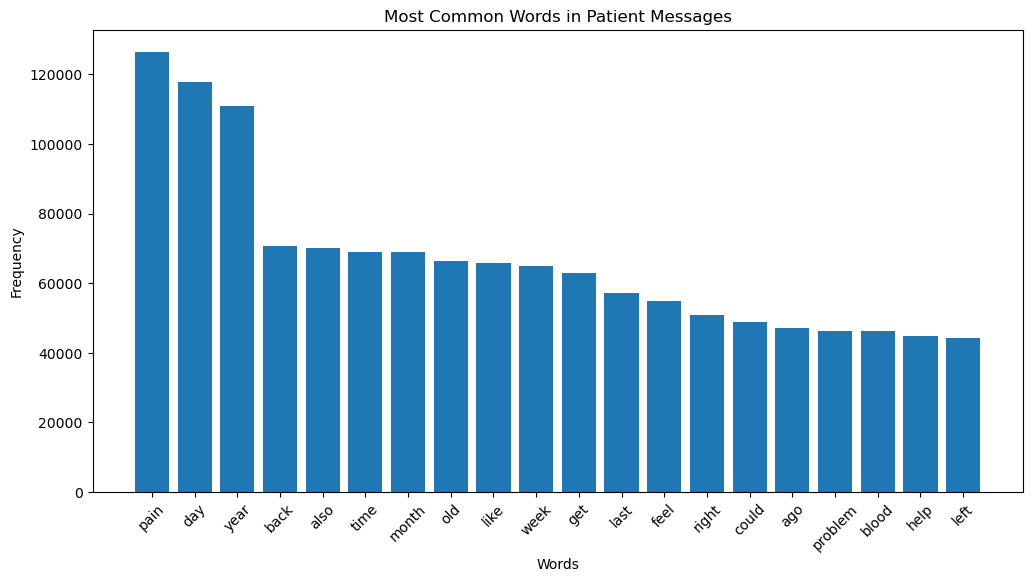

In [18]:
### **Exploratory Data Analysis (EDA)**
# Word Frequency Distribution for Patient messages
all_patient_words = [word for tokens in df['Patient_cleaned'] for word in tokens]
freq_dist_patient = FreqDist(all_patient_words)
most_common_patient = freq_dist_patient.most_common(20)
# Plotting the most common words
words, counts = zip(*most_common_patient)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Most Common Words in Patient Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



In [19]:
df.columns

Index(['Description', 'Patient', 'Doctor', 'Description_cleaned',
       'Patient_cleaned', 'Doctor_cleaned', 'Description_text', 'Patient_text',
       'Doctor_text'],
      dtype='object')

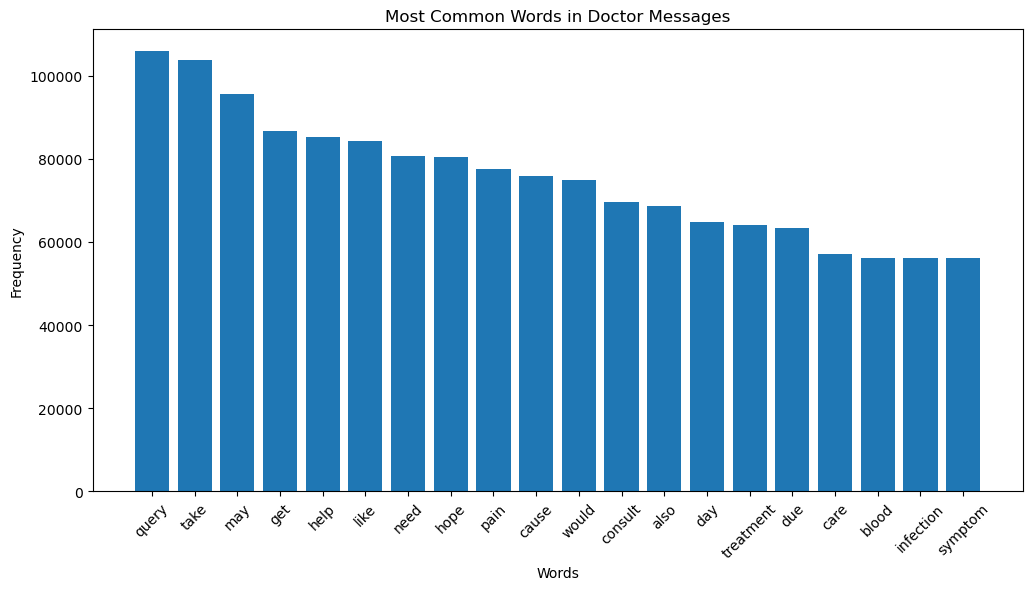

In [20]:
# Word Frequency Distribution for Doctor messages
all_doctor_words = [word for tokens in df['Doctor_cleaned'] for word in tokens]
freq_dist_doctor = FreqDist(all_doctor_words)
most_common_doctor = freq_dist_doctor.most_common(20)
# Plotting the most common words
words, counts = zip(*most_common_doctor)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Most Common Words in Doctor Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

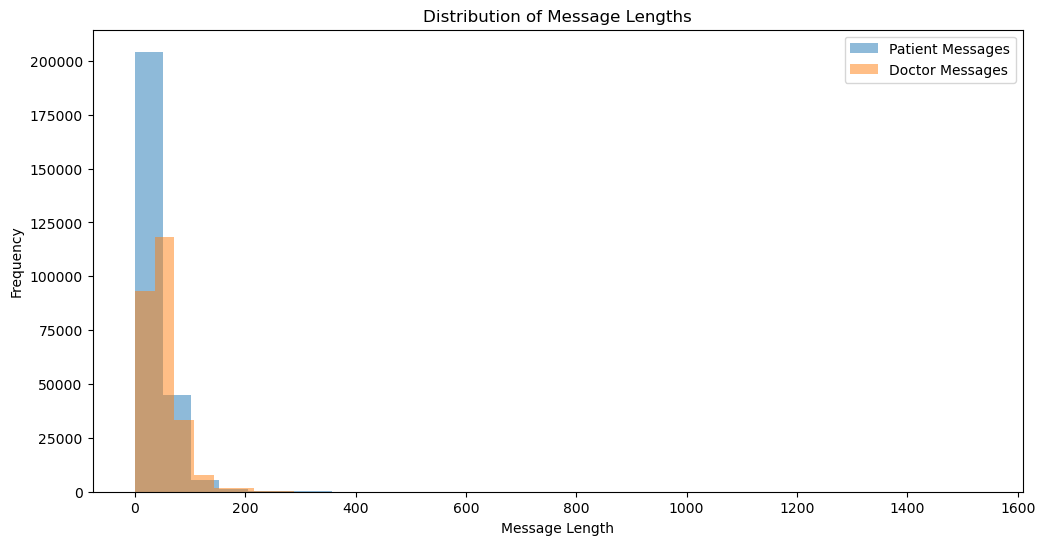

In [21]:

### **Visualization of Message Lengths**
# Calculate message lengths
df['Patient_msg_length'] = df['Patient_cleaned'].apply(len)
df['Doctor_msg_length'] = df['Doctor_cleaned'].apply(len)

# Plotting the message lengths
plt.figure(figsize=(12, 6))
plt.hist(df['Patient_msg_length'], bins=30, alpha=0.5, label='Patient Messages')
plt.hist(df['Doctor_msg_length'], bins=30, alpha=0.5, label='Doctor Messages')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


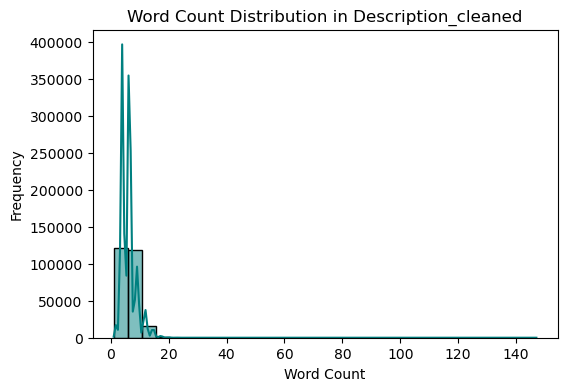

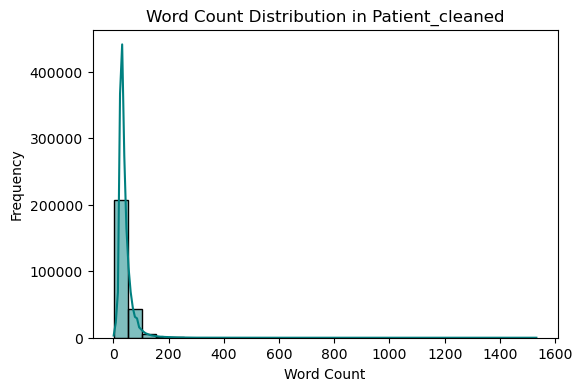

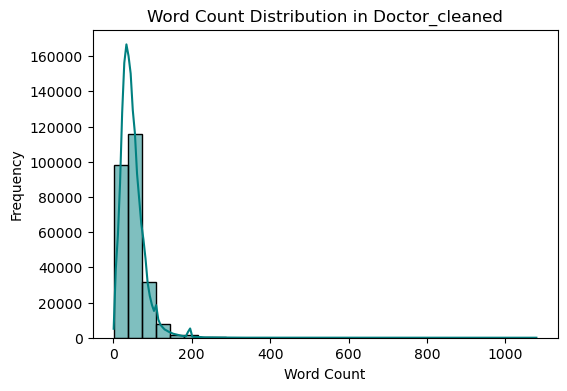

In [22]:
# Create new columns for text length in words
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    df[col + '_length'] = df[col].apply(lambda x: len(str(x).split()))

# Plot word count distribution for each text column
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col + '_length'], bins=30, kde=True, color='teal')
    plt.title(f"Word Count Distribution in {col}")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.show()

In [23]:
# ploting common pair of words in patient and doctor messages
# from nltk import bigrams
# from collections import Counter
# patient_bigrams = [bigram for tokens in df['Patient_cleaned'] for bigram in bigrams(tokens)]
# doctor_bigrams = [bigram for tokens in df['Doctor_cleaned'] for bigram in bigrams(tokens)]
# patient_bigram_counts = Counter(patient_bigrams).most_common(20)
# doctor_bigram_counts = Counter(doctor_bigrams).most_common(20)
# # Plotting Patient Bigrams
# patient_bigrams_words, patient_bigrams_counts = zip(*patient_bigram_counts)
# plt.figure(figsize=(12, 6))
# plt.bar([' '.join(bigram) for bigram in patient_bigrams_words], patient_bigrams_counts)
# plt.title('Most Common Bigrams in Patient Messages')
# plt.xlabel('Bigrams')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.show()

In [24]:
!pip install wordcloud

In [25]:
print(type(df['Patient_cleaned'].iloc[0]))

<class 'list'>


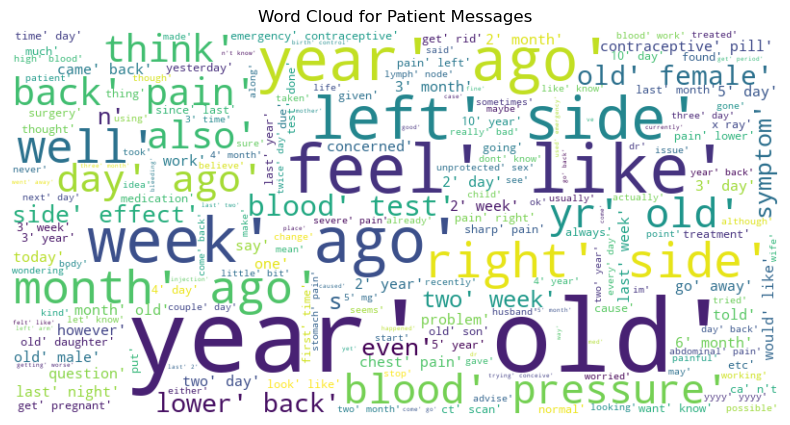

In [26]:
"# plotting wordcloud for doctor and patient messages",
from wordcloud import WordCloud
# Generate wordcloud for Patient messages using the string column created above,
patient_text = ' '.join(df['Patient_cleaned'].dropna().astype(str))
patient_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(patient_text)
# Plotting the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(patient_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Patient Messages')
plt.show()

In [ ]:
# Install gensim if it's not available and import Word2Vec
%pip install -q gensim
from gensim.models import Word2Vec

### word embedings using Word2Vec
# Prepare data for Word2Vec
patient_sentences = df['Patient_cleaned'].tolist()
# Ensure each entry is a list of tokens (handles both list and already-tokenized/string cases)
patient_sentences = [s if isinstance(s, list) else str(s).split() for s in patient_sentences]

# Train Word2Vec model
# word2vec_model = Word2Vec(sentences=patient_sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)


Note: you may need to restart the kernel to use updated packages.


Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_fl

**POS Tagging**

**POS Tagging** involves labeling each word in a sentence with its grammatical part of speech such as nouns, adjectives, verbs and adjectives


In [28]:
### parts of speech tagging
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
def get_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,  # Represents an Adjective
        'N': wordnet.NOUN, # Represents a Noun
        'V': wordnet.VERB, # Represents a Verb
        'R': wordnet.ADV   # Represents an Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Victong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# plotting the part of speech tags for patient and doctor messages


In [29]:
### synonyms and antonyms using wordnet
from nltk.corpus import wordnet
def get_synonyms_antonyms(word):
    synonyms = set()
    antonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
            if lemma.antonyms():
                antonyms.add(lemma.antonyms()[0].name())
    return list(synonyms), list(antonyms)


In [30]:
#### feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# Use the string columns created earlier (Patient_text, Doctor_text)
patient_tfidf = tfidf_vectorizer.fit_transform(df['Patient_text'].fillna(''))
doctor_tfidf = tfidf_vectorizer.fit_transform(df['Doctor_text'].fillna(''))
doctor_tfidf.shape
patient_tfidf.shape


(256916, 5000)

In [31]:
df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()

,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[abutment, nerve, root, mean]","[wondering, abutting, abutment, nerve, root, m...","[gone, query, diligence, would, like, know, he..."
1,"[reduce, weight, gained, due, genetic, hypothy...","[22-year-old, female, diagnosed, hypothyroidis...","[really, done, well, hypothyroidism, problem, ..."
2,"[q., started, get, lot, acne, face, particular...","[used, clear, skin, since, moved, new, place, ...","[acne, multifactorial, etiology, acne, soap, i..."
3,"[uncomfortable, feeling, middle, spine, left, ...","[uncomfortable, feeling, middle, spine, left, ...","[popping, discomfort, felt, either, improper, ..."
4,"[symptom, intercourse, threatns, even, negativ...","[two, year, sex, call, girl, dark, location, 1...","[hiv, test, us, finger, prick, blood, sample, ..."


In [32]:
### Label Encoding (Converts labels to integers)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['Description_cleaned','Patient_cleaned', 'Doctor_cleaned']:  
    df[col + '_encoded'] = label_encoder.fit_transform(df[col].astype(str))
df[['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']].head()



,Description_cleaned,Patient_cleaned,Doctor_cleaned
0,"[abutment, nerve, root, mean]","[wondering, abutting, abutment, nerve, root, m...","[gone, query, diligence, would, like, know, he..."
1,"[reduce, weight, gained, due, genetic, hypothy...","[22-year-old, female, diagnosed, hypothyroidis...","[really, done, well, hypothyroidism, problem, ..."
2,"[q., started, get, lot, acne, face, particular...","[used, clear, skin, since, moved, new, place, ...","[acne, multifactorial, etiology, acne, soap, i..."
3,"[uncomfortable, feeling, middle, spine, left, ...","[uncomfortable, feeling, middle, spine, left, ...","[popping, discomfort, felt, either, improper, ..."
4,"[symptom, intercourse, threatns, even, negativ...","[two, year, sex, call, girl, dark, location, 1...","[hiv, test, us, finger, prick, blood, sample, ..."


In [33]:
### One-Hot Encoding (Converts integers to binary vectors)
# The original code blew memory because get_dummies / dense one-hot for many tokens creates huge dense arrays.
# Fix strategy:
# - For token-list columns use MultiLabelBinarizer with sparse_output=True to produce sparse matrices.
# - Limit vocabulary to the top_k most frequent tokens to avoid exploding column count (adjust TOP_K as needed).
# - Convert the sparse result to a pandas sparse DataFrame (which keeps memory low) and concat.

from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

cols = ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']

# determine which columns contain list-like tokens and which are string-like
list_cols = [c for c in cols if df[c].apply(lambda x: isinstance(x, (list, tuple))).any()]
str_cols = [c for c in cols if c not in list_cols]

# tune this to limit number of one-hot features (reduce memory usage)
TOP_K = 5000

# One-hot encode token lists (creates one sparse column per token, limited to TOP_K most common tokens)
for c in list_cols:
	lists = df[c].apply(lambda x: x if isinstance(x, (list, tuple)) else [])
	# compute top tokens by frequency
	all_tokens = [tok for tokens in lists for tok in tokens]
	token_counts = Counter(all_tokens)
	top_tokens = [tok for tok, _ in token_counts.most_common(TOP_K)]
	# use MultiLabelBinarizer with sparse output and restricted classes
	mlb = MultiLabelBinarizer(classes=top_tokens, sparse_output=True)
	sparse_enc = mlb.fit_transform(lists)  # this is a scipy.sparse matrix
	# convert sparse matrix to a pandas sparse DataFrame to keep memory usage low
	enc_df = pd.DataFrame.sparse.from_spmatrix(sparse_enc,
											   columns=[f"{c}_{tok}" for tok in mlb.classes_],
											   index=df.index)
	df = pd.concat([df, enc_df], axis=1)

# For the remaining columns, prefer the *_text string column if it exists, otherwise fall back to the original column
# Use get_dummies only if there are few unique categories to avoid dense explosion
if str_cols:
	text_cols = []
	for c in str_cols:
		text_col = c.replace('_cleaned', '_text')
		text_cols.append(text_col if text_col in df.columns else c)
	# limit dummy creation to columns with reasonably small number of unique values
	safe_cols = [tc for tc in text_cols if df[tc].nunique() <= 1000]
	if safe_cols:
		df = pd.get_dummies(df, columns=safe_cols, prefix=[tc.split('_')[0] for tc in safe_cols])
	else:
		# if none are safe, skip to avoid memory blowup
		print("Skipped get_dummies: no text columns with a small number of unique categories.")


In [34]:
print(df.columns.tolist())


['Description', 'Patient', 'Doctor', 'Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned', 'Description_text', 'Patient_text', 'Doctor_text', 'Patient_msg_length', 'Doctor_msg_length', 'Description_cleaned_length', 'Patient_cleaned_length', 'Doctor_cleaned_length', 'Description_cleaned_encoded', 'Patient_cleaned_encoded', 'Doctor_cleaned_encoded', 'Description_cleaned_cause', 'Description_cleaned_pain', 'Description_cleaned_suggest', 'Description_cleaned_treatment', 'Description_cleaned_back', 'Description_cleaned_remedy', 'Description_cleaned_lump', 'Description_cleaned_could', 'Description_cleaned_chest', 'Description_cleaned_blood', 'Description_cleaned_severe', 'Description_cleaned_lower', 'Description_cleaned_pregnancy', 'Description_cleaned_child', 'Description_cleaned_taking', 'Description_cleaned_problem', 'Description_cleaned_get', 'Description_cleaned_q.', 'Description_cleaned_leg', 'Description_cleaned_side', 'Description_cleaned_due', 'Description_cleaned_infection', 

In [35]:
#### setting up a tokenizer and padding sequences for columns Description_cleaned, Patient_cleaned, Doctor_cleaned

#### setting up a tokenizer and padding sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Initialize the tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=TOP_K)
for col in ['Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned']:
    texts = df[col].apply(lambda x: x if isinstance(x, (list, tuple)) else str(x)).tolist()
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
    # Create DataFrame from padded sequences
    seq_df = pd.DataFrame(padded_sequences, columns=[f"{col}_seq_{i}" for i in range(padded_sequences.shape[1])])
    df = pd.concat([df, seq_df], axis=1)
print(df.columns.tolist())



['Description', 'Patient', 'Doctor', 'Description_cleaned', 'Patient_cleaned', 'Doctor_cleaned', 'Description_text', 'Patient_text', 'Doctor_text', 'Patient_msg_length', 'Doctor_msg_length', 'Description_cleaned_length', 'Patient_cleaned_length', 'Doctor_cleaned_length', 'Description_cleaned_encoded', 'Patient_cleaned_encoded', 'Doctor_cleaned_encoded', 'Description_cleaned_cause', 'Description_cleaned_pain', 'Description_cleaned_suggest', 'Description_cleaned_treatment', 'Description_cleaned_back', 'Description_cleaned_remedy', 'Description_cleaned_lump', 'Description_cleaned_could', 'Description_cleaned_chest', 'Description_cleaned_blood', 'Description_cleaned_severe', 'Description_cleaned_lower', 'Description_cleaned_pregnancy', 'Description_cleaned_child', 'Description_cleaned_taking', 'Description_cleaned_problem', 'Description_cleaned_get', 'Description_cleaned_q.', 'Description_cleaned_leg', 'Description_cleaned_side', 'Description_cleaned_due', 'Description_cleaned_infection', 

In [36]:
#### combining Patient_cleaned and Doctor_cleaned into a single column for chat modeling
df['Chat_cleaned'] = df['Patient_cleaned'] + df['Doctor_cleaned']
df['Chat_cleaned'].head()

0    [wondering, abutting, abutment, nerve, root, m...
1    [22-year-old, female, diagnosed, hypothyroidis...
2    [used, clear, skin, since, moved, new, place, ...
3    [uncomfortable, feeling, middle, spine, left, ...
4    [two, year, sex, call, girl, dark, location, 1...
Name: Chat_cleaned, dtype: object

In [37]:
### train test split to prepare for chat model training
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.shape, test_df.shape


((205532, 15318), (51384, 15318))